In [236]:
## PREDICTIONS FOR KETTLE AND STOVE USAGE BASED ON TEMPERATURE AND HUMIDITY


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score, roc_curve, auc

import matplotlib.pyplot as plt

In [237]:
df = pd.read_csv("Labeled_Binned_EnvSensor_Readings_40second.csv")

In [238]:
df

,bt_date_bt_time,BMP_TEMP,HDC_TEMP,HDC_HUM,Date,Time,Kettle,Stove
0,2019-03-28 15:00:00,17.660,17.850,58.74,28-03-2019,15:00:00:000000,0.0,0.0
1,2019-03-28 15:00:40,17.670,17.850,58.69,28-03-2019,15:00:40:000000,0.0,0.0
2,2019-03-28 15:01:20,17.665,17.860,58.64,28-03-2019,15:01:20:000000,0.0,0.0
3,2019-03-28 15:02:00,17.670,17.850,58.64,28-03-2019,15:02:00:000000,0.0,0.0
4,2019-03-28 15:02:40,17.670,17.855,58.55,28-03-2019,15:02:40:000000,0.0,0.0
5,2019-03-28 15:03:20,17.665,17.855,58.55,28-03-2019,15:03:20:000000,0.0,0.0
6,2019-03-28 15:04:00,17.670,17.850,58.55,28-03-2019,15:04:00:000000,0.0,0.0
7,2019-03-28 15:04:40,17.675,17.860,58.55,28-03-2019,15:04:40:000000,0.0,0.0
8,2019-03-28 15:05:20,17.660,17.850,58.45,28-03-2019,15:05:20:000000,0.0,0.0
9,2019-03-28 15:06:00,17.665,17.855,58.45,28-03-2019,15:06:00:000000,0.0,0.0


In [239]:
df = df[0:541]

In [240]:
#Look at how many values we have 1 for.
df[df.Kettle == 1].shape

(43, 8)

In [241]:
y = np.array(df['Kettle'])
y

y2 = np.array(df['Stove'])


In [242]:
X = df.drop(['bt_date_bt_time', 'Date', 'Time', 'Kettle', 'Stove'], axis = 1)
feature_names = X.columns
feature_names[1:]

Index(['HDC_TEMP', 'HDC_HUM'], dtype='object')

In [243]:

X = np.array(X)
X

array([[17.66 , 17.85 , 58.74 ],
       [17.67 , 17.85 , 58.69 ],
       [17.665, 17.86 , 58.64 ],
       ...,
       [17.76 , 17.93 , 58.55 ],
       [17.75 , 17.92 , 58.55 ],
       [17.755, 17.92 , 58.55 ]])

In [244]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.30, random_state=500)


X_tr2, X_test2, y_tr2, y_test2 = train_test_split(X, y2, test_size=0.30, random_state=500)




In [151]:
# time to try decision trees

tree_clf = tree.DecisionTreeClassifier(max_depth=3)

tree_clf.fit(X_tr,y_tr)

predicts = tree_clf.predict(X_test)
tree_clf.score(X_test,y_test)

1.0

In [152]:
print(predicts)
print(y_test)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [43]:
from sklearn.tree import export_graphviz
feats = feature_names

export_graphviz(tree_clf, out_file=("decision_tree.dot"), 
                feature_names=feats, 
                class_names=['kettle off', 'kettle on'], 
                rounded=True, filled=True)

In [102]:
#random trees
clf3 = RandomForestClassifier(n_jobs=-1, max_features='sqrt', oob_score = True) 
 
# Use a gridsearch for parameter finding
param_grid = { 
           "n_estimators" : [20,50,100,200],
           "max_depth" : [3,5,10,20, 50,100],
           "min_samples_leaf" : [5,10,30, 50]}
 
CV_rfc = GridSearchCV(estimator=clf3, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_tr, y_tr)
print(CV_rfc.best_params_)

KeyboardInterrupt: 

In [245]:
optimized_rf = RandomForestClassifier(n_jobs=-1, max_features='sqrt', oob_score = True, max_depth=20, 
                                      min_samples_leaf=5, n_estimators=20)

print("Kettle")
optimized_rf.fit(X_tr,y_tr)
predicts1 = optimized_rf.predict(X_test)
print(optimized_rf.score(X_test,y_test))

#gini_normalized(y_val, rf_predicts[:,1])
print(f1_score(predicts1, y_test))

print("Stove")
optimized_rf.fit(X_tr2,y_tr2)
predicts2 = optimized_rf.predict(X_test2)
print(optimized_rf.score(X_test2,y_test2))

#gini_normalized(y_val, rf_predicts[:,1])
print(f1_score(predicts2, y_test2))


Kettle
0.9263803680981595
0.5
Stove
1.0
1.0


In [253]:

X_test[:,2]

pred_df = pd.DataFrame()
pred_df['temp1'] = X_test[:,0]

pred_df['temp2'] = X_test[:,1]
pred_df['hum'] = X_test[:,2]
pred_df['actual'] = y_test
pred_df['rf_predict_kettle']= predicts1

pred_df['rf_predict_stove']= predicts2



In [222]:
pred_df

,temp1,temp2,hum,actual,rf_predict_kettle,rf_predict_stove
0,17.740000,17.920000,57.920000,0.0,0.0,0.0
1,17.655000,17.845000,57.490000,0.0,0.0,0.0
2,17.960000,18.170000,63.975714,0.0,0.0,0.0
3,17.710000,17.870000,58.740000,0.0,0.0,0.0
4,17.670000,17.850000,57.390000,0.0,0.0,0.0
5,17.930000,18.120000,67.853333,1.0,1.0,0.0
6,17.900000,18.080000,58.350000,0.0,0.0,0.0
7,17.650000,17.825000,57.580000,0.0,0.0,0.0
8,17.610000,17.800000,58.160000,0.0,0.0,0.0
9,17.660000,17.855000,57.390000,0.0,0.0,0.0


In [125]:
#roc curve
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predicts1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
   

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predicts1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

IndexError: index 1 is out of bounds for axis 1 with size 1

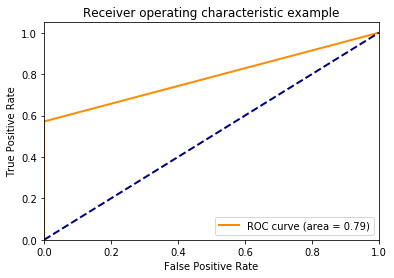

In [112]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [61]:
tree = optimized_rf.estimators_[1]
export_graphviz(tree, out_file=("rf_kettle.dot"), 
                feature_names=feats, 
                class_names=['kettle off', 'kettle on'], 
                rounded=True, filled=True)

In [59]:
#NOW PREDICT STOVE
X_tr, X_test, y_tr, y_test = train_test_split(X, y2, test_size=0.30, random_state=23)


tree_clf = tree.DecisionTreeClassifier(max_depth=3)

tree_clf.fit(X_tr,y_tr)

predicts = tree_clf.predict(X_test)
print(tree_clf.score(X_test,y_test))

print(f1_score(predicts, y_test))


0.9693251533742331
0.7058823529411764


In [28]:
export_graphviz(tree_clf, out_file=("decision_tree2.dot"), 
                feature_names=feats, 
                class_names=['stove off', 'stove on'], 
                rounded=True, filled=True)

In [21]:
#svc

clf3 = SVC()
# Use a gridsearch for parameter finding
param_grid = { 
               "C" : [0.5,1,3,5, 10]}

CV_svc = GridSearchCV(estimator=clf3, param_grid=param_grid, cv= 10)
CV_svc.fit(X_tr, y_tr)




/home/jasonmts/Installations/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jasonmts/Installations/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jasonmts/Installations/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/hom

/home/jasonmts/Installations/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jasonmts/Installations/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jasonmts/Installations/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/hom

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.5, 1, 3, 5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [22]:
print(CV_svc.best_params_)


{'C': 5}


In [248]:

print("Kettle")

svm_clf = SVC(C=5)
svm_clf.fit(X_tr,y_tr)
predicts1 = svm_clf.predict(X_test)
print(svm_clf.score(X_test, y_test))
print(f1_score(predicts, y_test))


print("Stove")
svm_clf.fit(X_tr2,y_tr2)
predicts2 = svm_clf.predict(X_test2)
print(svm_clf.score(X_test2,y_test2))

#gini_normalized(y_val, rf_predicts[:,1])
print(f1_score(predicts, y_test2))

Kettle
0.9386503067484663
0.0
Stove
0.9877300613496932
0.23529411764705882


In [252]:

print("Kettle")

nb_clf= GaussianNB()
nb_clf.fit(X_tr,y_tr)
predicts1 =nb_clf.predict(X_test)
print(nb_clf.score(X_test, y_test))
print(f1_score(predicts, y_test))


print("Stove")
nb_clf.fit(X_tr2,y_tr2)
predicts2 =nb_clf.predict(X_test2)
print(nb_clf.score(X_test2,y_test2))

#gini_normalized(y_val, rf_predicts[:,1])
print(f1_score(predicts, y_test2))

Kettle
0.8773006134969326
0.0
Stove
0.9202453987730062
0.23529411764705882


In [208]:
pred_df


,temp1,temp2,hum,actual,rf_predict_kettle,rf_predict_stove
0,17.760000,17.930000,58.550000,0.0,0.0,0.0
1,17.770000,17.950000,58.740000,0.0,0.0,0.0
2,18.665000,18.855000,59.805000,0.0,0.0,1.0
3,17.735000,17.920000,57.010000,0.0,0.0,0.0
4,17.625000,17.810000,58.160000,0.0,0.0,0.0
5,17.860000,18.020000,58.450000,0.0,0.0,0.0
6,17.817500,17.995000,58.550000,0.0,0.0,0.0
7,17.650000,17.850000,58.350000,0.0,0.0,0.0
8,17.690000,17.870000,57.290000,0.0,0.0,0.0
9,18.535000,18.730000,64.046667,0.0,0.0,1.0


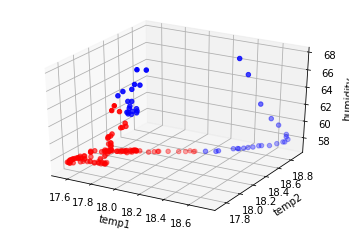

In [254]:
from mpl_toolkits.mplot3d import Axes3D


df_kettleon = pred_df[(pred_df['rf_predict_kettle'] == 1) | (pred_df['rf_predict_stove'] == 1)]
x = np.array(df_kettleon['temp1'])
y = np.array(df_kettleon['temp2'])
z = np.array(df_kettleon['hum'])

df_kettleoff = pred_df[(pred_df['rf_predict_kettle'] == 0) & (pred_df['rf_predict_stove'] == 0)]
x2 = np.array(df_kettleoff['temp1'])
y2 = np.array(df_kettleoff['temp2'])
z2 = np.array(df_kettleoff['hum'])


ax = plt.subplot(111, projection='3d')
ax.scatter(x,y,z, c='b')
ax.scatter(x2,y2,z2, c='r')

ax.set_zlabel('humidity')
ax.set_ylabel('temp2')
ax.set_xlabel('temp1')
plt.show()

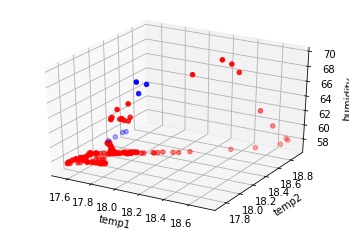

In [173]:
from mpl_toolkits.mplot3d import Axes3D


df_kettleon = pred_df[pred_df['actual'] == 1]
x = np.array(df_kettleon['temp1'])
y = np.array(df_kettleon['temp2'])
z = np.array(df_kettleon['hum'])

df_kettleoff = pred_df[pred_df['actual'] == 0]
x2 = np.array(df_kettleoff['temp1'])
y2 = np.array(df_kettleoff['temp2'])
z2 = np.array(df_kettleoff['hum'])


ax = plt.subplot(111, projection='3d')
ax.scatter(x,y,z, c='b')
ax.scatter(x2,y2,z2, c='r')

ax.set_zlabel('humidity')
ax.set_ylabel('temp2')
ax.set_xlabel('temp1')
plt.show()